<a href="https://colab.research.google.com/github/CarolineAndradeR/Data-Science/blob/main/Modelagem_Preditiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conceitos**

A ideia é simples: Utilizar uma base de dados conhecida de um determindo evento para prever o que acontecerá num momento futuro, mantendo as principais características nas quais o evento está envolvido.

Classificação evolutiva em relação á decisão e ação:
*   Análise Descritiva: descreve o histórico do que aconteceu.
*   Análise Diágnostica: traz os porquês de algo ter acontecido.
*   **Análise Preditiva: Procura trazer o que acontecerá, uma previsão.**
*   Análise Prescitiva: Traz ações que deveria ser feitas.
*   Inteligência Artificial: Automatização de ações humanas.


Um modelo/ análise preditiva é conhecida como um tipo de apredizagem supervisionada.

**Variável-alvo** - variável dependente, variável endógena ou simplesmente Y.
**Variáveis preditoras** - variáveis independentes, variáveis exogenas, features (caracterizada) ou simplesmente X's.

**Regressores** - Quando realizamos previsões de variáveis numéricas.
**Classificadores** - Quando realizamos previsões categóricas.


**Pipeline de Modelos Preditivos**

Etapas do processo:

* Entendimento do Négocio: entender qual o objetivo, pois é ele que nos guiará durante o processo. Responder o que estamos querendo prever. Nessa etapa entedemos se vamos trabalhar com regressor ou classificador e também definir qual é a variável-alvo.
* Entendimento dos dados: Entender quais dados serão necessários para atingir o objetivo.
* Preparação dos dados: Entra desde limpezas de dados, até as transformações de variáveis. Essa etapa também é conhecida como feature engineer, dado que estamos trabalhando na engenharia (construção, transformação etc.) das features (ou variáveis preditoras).
* Modelagem estatistica: Construção dos modelos estatísticos. É chamado dessa forma por não possuir fórmulas exatas, precisas, como são estimativas de futuro sempre há um erro (estatístico) associado, inerente ao processo.
* Avaliação do mdelo: Após a construção do modelo é necessário avaliar se o modelo tem erro estatístico estimado aceitável. Nesse etapa é importante saber analisar os erros.
* Deploy: Ambiente de produção.


**Montagem de Um Pipeline de ML**
1. Carga das bibliotecas a serem utilizadas.
2. Carga dos dados.
3. Preparação dos dados.
4. Separação das amostras de treino e teste.
5. Construção do modelo.
6. Avaliação do modelo.


# **Montagem de Um Pipeline de ML**

In [3]:
# Conhecendo a base de dados
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/wine/red_wine4_30.csv", encoding='latin-1')
df.head()

,Unnamed: 0,wine_name,wine_year,wine_country,wine_region,winery,wine_rating,n_ratings,wine_price
0,1,Merlot,2019,United States,California,Crane Lake,3.6,30,4.99
1,2,Cabernet Sauvignon,2011,United States,Columbia Valley,Hogue,3.3,76,4.95
2,3,Hot To Trot Smooth Red Blend,2013,United States,Columbia Valley,14 Hands,3.7,3917,4.99
3,4,Cabernet Sauvignon,2010,Chile,Maule Valley,Aromo,3.0,189,4.99
4,5,Loggia del Conte Chianti,2016,Italy,Chianti,Le Chiantigiane,3.3,149,4.99


In [4]:
# Estruturação do pipeline - Básica

# 1 - Carga das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2 - Carga dos dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/wine/red_wine4_30.csv", encoding='latin-1')

# 3 - Preparação dos dados
# Vamos utilizar os dados sem nenhum tratamento.

# 4 - Separação das amostras de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['wine_year', 'wine_price']], df['wine_rating'],test_size=0.3266, random_state=33)

# 5 - Construção do modelo
mod = LinearRegression()
mod.fit(x_treino,y_treino)

# 6 - Avaliação do modelo
y_prev = mod.predict(x_teste)
mean_squared_error(y_teste, y_prev)

0.04082351716560254

# **Avaliação de Modelos**

É de extrema importancia avaliar se o modelo está no caminho certo.

A previsão é "boa"  quando acertamos, e “ruim”, quando erramos. Mas a resposta não é tão simples quando acertar ou errar. Utilizamos o termo função perda (loss function) para definir uma função (ou fórmula) de cálculo para "quanto perdemos" , para quando tentamos fazer uma previsão. Dizemos então que queremos desenvolver algoritmos que minimizem a função perda (ou tenha um erro reduzido).

Acurracia é proporção da soma de acerto possitivos e a soma dos acertos negativos divido pela quantidade total de observações da amostra teste.

O que muda significativamente da avaliação de um regressor para um classificador é que não temos mais uma variável-alvo numérica; um classificador classifica classes ou categorias.

**Regressores**

É utilizada quando estamos aplicando técnicas de análise preditiva ou modelos de aprendizagem supervisionada, em uma variável y é do tipo numérica.

In [6]:
# Valores de teste previsto x real
 = pd.DataFrame({"prev": y_prev, "real": y_teste})
ev.head(n=10)

,prev,real
253,3.534321,3.5
2052,3.648876,3.9
3695,3.715762,3.3
630,3.592574,3.9
6594,3.847883,3.7
5958,3.787866,3.7
6489,3.833733,3.8
9552,3.913194,3.9
6112,3.795111,3.6
8700,3.920812,3.9


Os valores previstos são próximos aos valores reais, sendo que alguns são mais próximos e outros mais distantes. Essa distância, é o erro de previsão.

Existe erros negativos, isso ocorre, pois o algoritmo preditivo, às vezes, "erra para cima" e, outras vezes, "erra para baixo" .

In [7]:
ev['erro_absoluto'] = y_prev-y_teste
ev['erro_relativo'] = (y_prev-y_teste)/y_teste
ev.head(n=10)

,prev,real,erro_absoluto,erro_relativo
253,3.534321,3.5,0.034321,0.009806
2052,3.648876,3.9,-0.251124,-0.064391
3695,3.715762,3.3,0.415762,0.125988
630,3.592574,3.9,-0.307426,-0.078827
6594,3.847883,3.7,0.147883,0.039968
5958,3.787866,3.7,0.087866,0.023748
6489,3.833733,3.8,0.033733,0.008877
9552,3.913194,3.9,0.013194,0.003383
6112,3.795111,3.6,0.195111,0.054197
8700,3.920812,3.9,0.020812,0.005337


O histograma é uma ferramenta boa para analisar a distribuição de erros quando queremos responder a perguntas com "estamos errando mais para cima ou mais para baixo?"

array([[<Axes: title={'center': 'erro_absoluto'}>]], dtype=object)

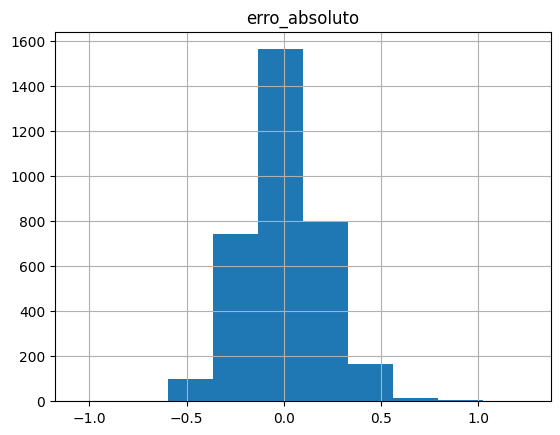

In [8]:
ev.hist('erro_absoluto')

Podemos interpretar esse histograma dizendo que, na grande maioria das vezes (das predições), nosso algoritmo preditivo tem um erro entre -0,5 e 0,5.

**Intervalo de Confiança**

Para calcular o intervalo de confiança, é necessário escolher primeiro o que é o intervalo que queremos, qual é o % de confiança que queremos obter. A grande maioria das análise é de 95% de confiança, que seria, em 100 previsões termos 95 dentro do intervalo que calculamos. As outras 5 podem ter um erro maior.

In [12]:
import numpy as np
import scipy.stats as st

data = ev['erro_absoluto'].to_numpy()
ci = st.t.interval(0.95, len(ev.index) - 1, loc=np.mean(data), scale=np.std(data))
print(ci)

(-0.3974767426788493, 0.39480351539171527)


Isso significa dizer que 95% das previsões que fizermos terão um erro menor que 0,39747 para cima ou para baixo.

<Axes: xlabel='prev', ylabel='prev'>

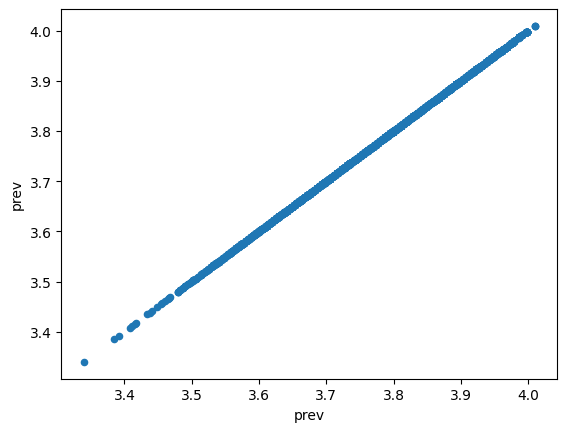

In [14]:
# Interpretação gráfica do erro de Previsão*
# Quanto mais os valores previstos x reais se parecerem com uma reta com inclinação positiva, mais próximos eles serão.
ev.plot.scatter(x="prev", y="prev")

**MÉTRICAS PARA CÁLCULO DO ERRO DE PREVISÃO (LOSS FUNCTION)**

Podemos calcular a média dessa coluna. Como resultado quanto menor for o valor dessa métrica, menor será o erro. O nome dessa métrica é média do erro quadrático ou Mean of Squared Error MSE.

Para calcular a media com valores positivos e negativos presentes na mesma variável é necessario elevar os valores ao quadrado para que eles se torne possitivos.

Podemos somar essa coluna. Como resultado, quanto menor for o valor, menor será o erro de previsão. Essa métrica se chama soma do erro quadrático ou Sum of Squared Error, que se abrevia por SSE.


In [16]:
# Cálculo do erro quadrátivo
ev['erro_quadrado']=ev['erro_absoluto']**2
ev

,prev,real,erro_absoluto,erro_relativo,erro_quadrado
253,3.534321,3.5,0.034321,0.009806,0.001178
2052,3.648876,3.9,-0.251124,-0.064391,0.063063
3695,3.715762,3.3,0.415762,0.125988,0.172858
630,3.592574,3.9,-0.307426,-0.078827,0.094511
6594,3.847883,3.7,0.147883,0.039968,0.021869
...,...,...,...,...,...
4265,3.754047,3.6,0.154047,0.042791,0.023730
1556,3.630109,3.6,0.030109,0.008364,0.000907
8806,3.907714,3.7,0.207714,0.056139,0.043145
4461,3.765382,3.4,0.365382,0.107465,0.133504


**Classificadores**

* Acurácia: em resumo, é a taxa de acertos, ou seja, de todas as previsões. A fórmula  ACC = (TP + TN) / (TP + TN + FP + FN).

* Precisão: é uma das formas de avaliar os erros de previsão, neste caso, o erro FP. Sua fórmula de cálculo é P = TP / (TP + FP).

* Recall: é uma das formas de avaliar os erros de previsão, neste caso o erro FN. Sua fórmula de cálculo é R = TP / (TP + FN).

In [15]:
# Avaliação de Classificação

# 1 - Carga das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# 2 - Carga dos dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/arvore_titanic.csv")

# 3 - Preparação dos dados

# 4 - Separação das amostras de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['Pclass']], df['Survived'],test_size=0.3266, random_state=33)

# 5 - Construção do modelo
mod = tree.DecisionTreeClassifier()
mod.fit(x_treino,y_treino)

# 6 - Avaliação do modelo
y_prev = mod.predict(x_teste)
accuracy_score(y_teste, y_prev)

0.678082191780822

In [18]:
acc= accuracy_score(y_teste, y_prev)
p = precision_score(y_teste, y_prev)
r = recall_score(y_teste, y_prev)

[acc, p, r]

[0.678082191780822, 0.6086956521739131, 0.3853211009174312]